<a href="https://colab.research.google.com/github/LaurenVaught/DigitRecognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ingest

In [ ]:
import numpy as np
from numpy import arange
import pandas as pd
import os
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error

import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
#from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
import xgboost as xg
#from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
# load the modules

import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['datetime', 'norm']
`%matplotlib` prevents importing * from pylab and numpy



In [ ]:
#upload from raw link on github
samplesubmission= pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/sample_submission.csv') 
train = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/train.csv.zip') 
test = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/test.csv.zip')


#EDA

In [ ]:
train.shape

(42000, 785)

In [ ]:
test.shape

(28000, 784)

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train.isna().any().any()

False

There are no missing values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



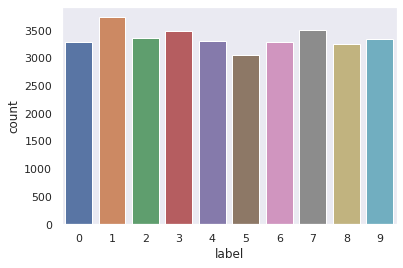

In [ ]:
#split into train and test sets

X = train.drop(columns=['label'], axis=1)
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

g= sns.countplot(y_train)

#Random Forest Classifier

In [ ]:
import time 
start = time.time()

#training model
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features='auto', max_depth=None, criterion='entropy', bootstrap=False)
rfc.fit(X_train, y_train)

#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)
#accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

end = time.time()
print('--- %s seconds ---' % (end - start))

confusion matrix:
 [[833   0   2   0   1   2   6   0   7   1]
 [  0 935   5   0   1   0   0   3   3   2]
 [  4   2 790   1   4   2   1   6   7   0]
 [  3   0  13 810   1  23   1   5   9   5]
 [  2   1   2   0 734   0   5   0   4  15]
 [  3   0   2  13   3 708   6   1   7   2]
 [  4   1   0   0   3   7 832   0   2   0]
 [  1   6  12   0   3   0   0 852   6  11]
 [  2   4   4   7   4   6   4   2 772  13]
 [  2   2   2  13  20   1   1   8   4 793]]
accuracy score =  0.9594047619047619
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       852
           1       0.98      0.99      0.98       949
           2       0.95      0.97      0.96       817
           3       0.96      0.93      0.95       870
           4       0.95      0.96      0.96       763
           5       0.95      0.95      0.95       745
           6       0.97      0.98      0.98       849
           7       0.97      0.96      0.96       891
 

In [ ]:
results = rfc.predict(test)

In [ ]:
# prepare submit file

np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

##PCA

In [ ]:
#combine training and test datasets
bothsets= [X, test]
combined = pd.concat(bothsets)

In [ ]:
combined.shape

(70000, 784)

--- 20.894753456115723 seconds ---


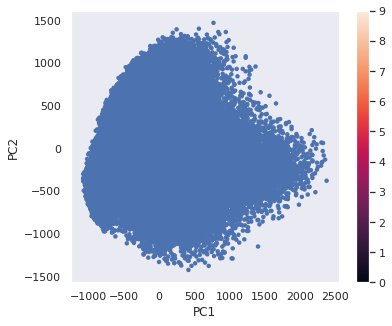

In [ ]:
start = time.time()

pca = PCA(n_components=0.95)
pca.fit(combined)
transform = pca.transform(combined)

figure(figsize(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")

end = time.time()
print('--- %s seconds ---' % (end - start))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

start = time.time()

pcadecomposition = PCA(n_components=0.95)
pcadecomposition.fit(combined)

print(pcadecomposition.n_features_in_)
print(pcadecomposition.n_components_)

end = time.time()
print('--- %s seconds ---' % (end - start))

784
154
--- 20.843046188354492 seconds ---


Testing PCA with 154 components covering 95% of the variance.

--- 11.558904886245728 seconds ---


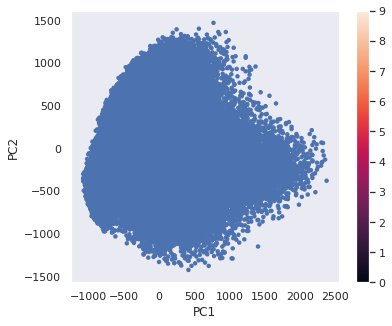

In [ ]:
start = time.time()

pca = PCA(n_components=154)
pca = pca.fit(combined)
reducedpca= pca.transform(combined)

figure(figsize(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")

end = time.time()
print('--- %s seconds ---' % (end - start))

In [ ]:
X_reduced_pca = PCA(n_components=154, random_state=42).fit_transform(reducedpca)

In [ ]:
X_reduced_pca = PCA(n_components=0.95, random_state=42).fit_transform(combined)

In [ ]:
x_pca = pca.transform(combined)

In [ ]:
x_pca.shape

(70000, 154)

In [ ]:
X_pca = x_pca[:42000,:]
x_test_pca = x_pca[42000:,:]
print("train shape:",X_pca.shape)
print("test shape:",x_test_pca.shape)

train shape: (42000, 154)
test shape: (28000, 154)


#Random Forest PCA Compressed


In [ ]:
X_train_pca = reducedpca
X_test_pca = pca.transform(X_test)
#test_pca = pca.transform(test)


In [ ]:
start = time.time()

#training model
rfc_pca = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=5, max_features='auto', max_depth=None, criterion='entropy', bootstrap=False)
rfc_pca.fit(X_train, y_train)

#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)
#accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report: \n",classification_report(y_test,y_pred))

end = time.time()
print('--- %s seconds ---' % (end - start))

confusion matrix:
 [[833   0   2   0   1   2   6   0   7   1]
 [  0 935   5   0   1   0   0   3   3   2]
 [  4   2 790   1   4   2   1   6   7   0]
 [  3   0  13 810   1  23   1   5   9   5]
 [  2   1   2   0 734   0   5   0   4  15]
 [  3   0   2  13   3 708   6   1   7   2]
 [  4   1   0   0   3   7 832   0   2   0]
 [  1   6  12   0   3   0   0 852   6  11]
 [  2   4   4   7   4   6   4   2 772  13]
 [  2   2   2  13  20   1   1   8   4 793]]
accuracy score =  0.9594047619047619
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       852
           1       0.98      0.99      0.98       949
           2       0.95      0.97      0.96       817
           3       0.96      0.93      0.95       870
           4       0.95      0.96      0.96       763
           5       0.95      0.95      0.95       745
           6       0.97      0.98      0.98       849
           7       0.97      0.96      0.96       891
 

In [ ]:
resultspca= rfc_pca.predict(test)

In [ ]:
# prepare submit file

np.savetxt('resultspca.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

##K-means Cluster

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

11501568/11490434 [==============================] - 0s 0us/step
Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [ ]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [ ]:
import matplotlib.pyplot as plt

# python magic function
%matplotlib inline

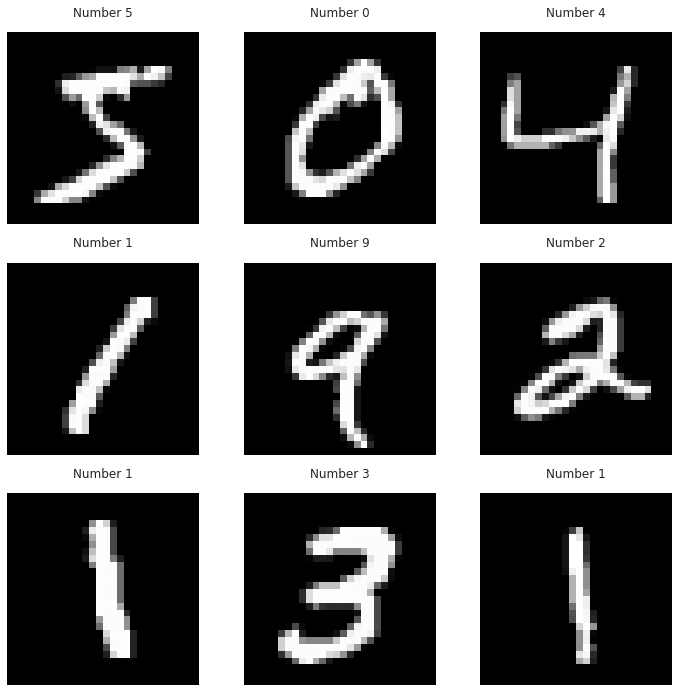

In [ ]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
fig.show()

In [ ]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([9, 4, 8, ..., 9, 7, 3], dtype=int32)

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [ ]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[8 0 4 1 7 6 1 8 1 7 3 1 3 6 1 7 6 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
#optimizing and Evaluating the Clustering Algorithm
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [ ]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2363613.766568971
Homogeneity: 0.47692473560078674
Accuracy: 0.5903

Number of Clusters: 16
Inertia: 2214553.8902730998
Homogeneity: 0.5353072002137381
Accuracy: 0.6085833333333334

Number of Clusters: 36
Inertia: 1958269.104189312
Homogeneity: 0.6942446102846334
Accuracy: 0.7736166666666666

Number of Clusters: 64
Inertia: 1804185.9799088896
Homogeneity: 0.7458881796927777
Accuracy: 0.82505

Number of Clusters: 144
Inertia: 1624145.689631693
Homogeneity: 0.8036956554467874
Accuracy: 0.8671666666666666

Number of Clusters: 256
Inertia: 1503696.0244018813
Homogeneity: 0.8451502802576499
Accuracy: 0.9018166666666667



In [ ]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.892



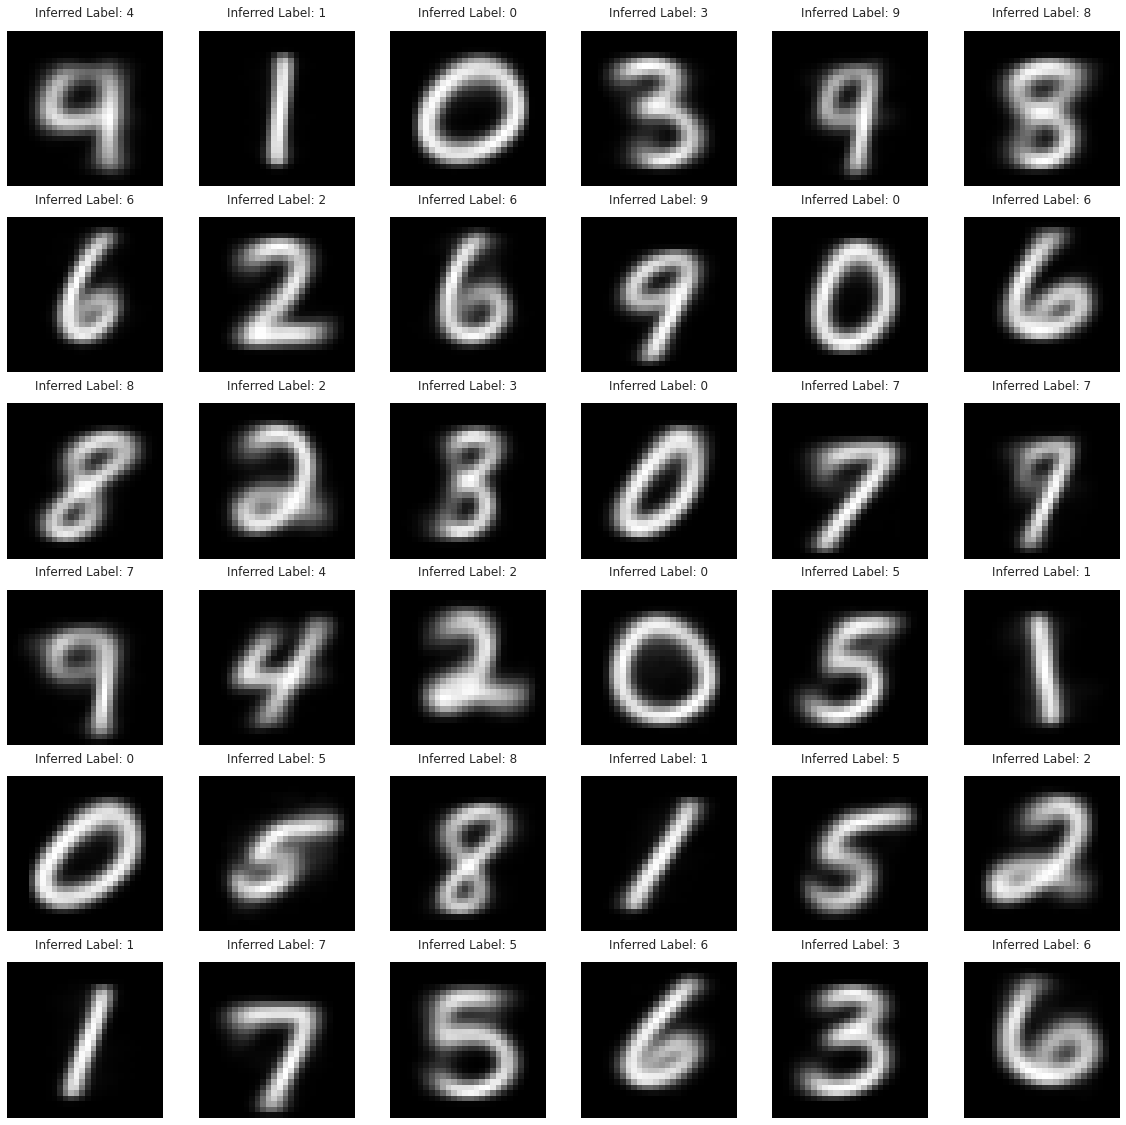

In [ ]:
#visualizing cluster centroid
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

In [ ]:
results= kmeans.fit(X)

In [ ]:
n_digits = len(np.unique(y_train))
n_digits

10

K-means Test

In [ ]:
from sklearn.cluster import MiniBatchKMeans
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

ValueError: ignored

In [ ]:
# Retrieve the digits of the training set label column
n_digits = len(np.unique(y_test))
print(n_digits)

10


In [ ]:
# Set clusters equal to the 10 different digits
kmeans = MiniBatchKMeans(n_clusters = n_digits)
# Fit the model to the training data
kmeans.fit(X_train)
kmeans.labels_

array([7, 5, 1, ..., 5, 9, 4], dtype=int32)

In [ ]:
# Assign cluster labels
def infer_cluster_labels(kmeans, actual_labels):
  
  inferred_labels = {}

  for i in range(kmeans.n_clusters):
    
    # Find index of points in cluster
    labels = []
    index = np.where(kmeans.labels_ == i)
    
    # Append actual labels for each point in cluster
    labels.append(actual_labels[index])
    
    # Determine most common label
    if len(labels[0]) == 1:
      counts = np.bincount(labels[0])
    else:
      counts = np.bincount(np.squeeze(labels))
    
    # Assign cluster to a value in the inferred_labels dictionary
    if np.argmax(counts) in inferred_labels:
      # Append the new number to the existing array at this slot
      inferred_labels[np.argmax(counts)].append(i)
    else:
     # Create a new array in this slot
      inferred_labels[np.argmax(counts)] = [i]

  return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
  # Empty array of len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
    for key, value in cluster_labels.items():
      if cluster in value:
        predicted_labels[i] = key
  
  return predicted_labels

In [ ]:
# Test infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(X_clusters,X_clusters.shape)
print(cluster_labels)
print(predicted_labels[:20])
print(y_train[:20])

[7 5 1 ... 5 9 4] (33600,)
{1: [0, 1, 2, 3, 4, 5, 6, 8], 0: [7, 9]}
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
from sklearn.metrics import homogeneity_score

def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = estimator.inertia_
    print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = homogeneity_score(labels, estimator.labels_)
    print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

In [ ]:
from sklearn.metrics import accuracy_score

clusters = [10, 16, 36, 64, 144, 256]
iner_list = []
homo_list = []
acc_list = []

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X_train)
    
    inertia, homo = calc_metrics(estimator, X_train, y_train)
    iner_list.append(inertia)
    homo_list.append(homo)
    
    # Determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, y_train.iloc)
    prediction = infer_data_labels(estimator.labels_, cluster_labels)
    
    acc = accuracy_score(y_train, prediction)
    acc_list.append(acc)
    print('Accuracy: {}\n'.format(acc))

Number of Clusters: 10
Inertia: 86226293007.31512


ValueError: ignored

#K-means Test


In [ ]:
kmeans = MiniBatchKMeans(n_clusters=256)
kmeans.fit(X_test)

cluster_labels = infer_cluster_labels(kmeans, y_test)

test_clusters = kmeans.predict(X_test)
prediction = infer_data_labels(kmeans.predict(X_test), cluster_labels)
print('Accuracy: {}'.format(accuracy_score(y_test, prediction)))

Accuracy: 0.9036


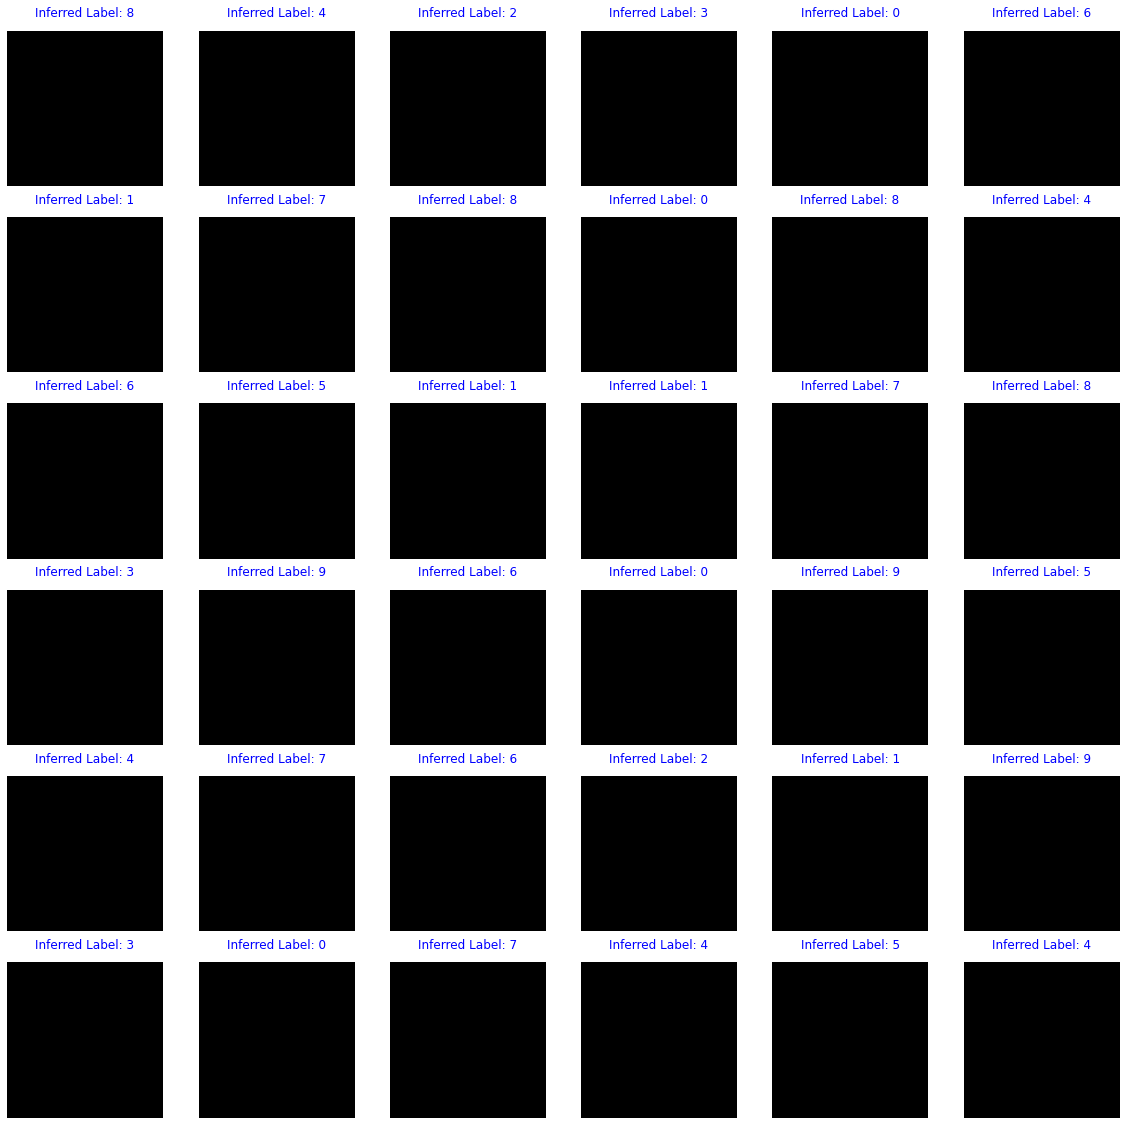

In [ ]:
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X_test, y_test)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, y_test)
prediction = infer_data_labels(kmeans.predict(X_test), cluster_labels)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():        
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key), color='blue')
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
plt.show()

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=256)
kmeans.fit(X_test, y_test)

cluster_labels = infer_cluster_labels(kmeans, y_test)

test_clusters = kmeans.predict(test)
prediction = infer_data_labels(kmeans.predict(test), cluster_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
ID = pd.DataFrame()
ID['ImageId'] = test.index+1
kmeans_pred = prediction

kmeanstest = pd.concat([ID,pd.DataFrame(kmeans_pred)],axis=1)
kmeanstest.columns = ['ImageId','Label']

In [ ]:
results= kmeanstest

# prepare submit file

np.savetxt('kmeansresults.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

#Neural Network

##Keras


In [ ]:
# Keras example found on: https://www.kaggle.com/poonaml/deep-neural-network-keras-way
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
#from keras.optimizers import Adam , RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#upload from raw link on github
samplesubmission= pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/sample_submission.csv') 
train = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/train.csv.zip') 
test = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/test.csv.zip')

In [ ]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

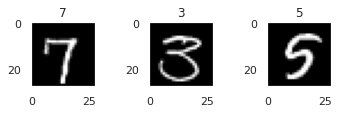

In [ ]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [ ]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [ ]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [ ]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



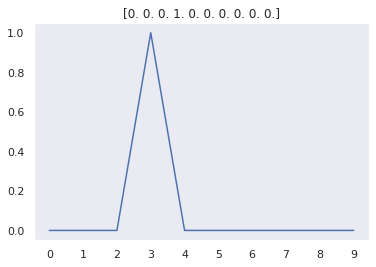

In [ ]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [ ]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [ ]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [ ]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [ ]:
#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [ ]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [ ]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/3
37800/37800 [==============================] - 7s 141us/step - loss: 0.4370 - accuracy: 0.8692 - val_loss: 0.3311 - val_accuracy: 0.9062


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

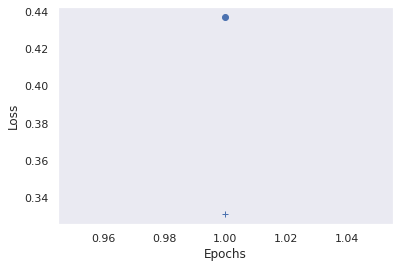

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()


In [ ]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [ ]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



37800/37800 [==============================] - 6s 136us/step - loss: 0.3613 - accuracy: 0.9103 - val_loss: 0.2196 - val_accuracy: 0.9400


In [ ]:
#from keras.optimizers import Adam , RMSprop

from tensorflow.keras.optimizers import Adam 

In [ ]:
#CNN
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model= get_cnn_model()
model.optimizer.lr=0.01

In [ ]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



37800/37800 [==============================] - 91s 2ms/step - loss: 2.3109 - accuracy: 0.1092 - val_loss: 2.3003 - val_accuracy: 0.1043


In [ ]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [ ]:
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



37800/37800 [==============================] - 77s 2ms/step - loss: 2.3019 - accuracy: 0.1077 - val_loss: 2.2998 - val_accuracy: 0.1121


In [ ]:
#normalization
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



37800/37800 [==============================] - 113s 3ms/step - loss: 0.2405 - accuracy: 0.9336 - val_loss: 0.0971 - val_accuracy: 0.9717


In [ ]:
#predictions
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



42000/42000 [==============================] - 103s 2ms/step - loss: 0.0598 - accuracy: 0.9831


In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
ID = pd.DataFrame()
ID['ImageId'] = test.index+1
resultskeras= predictions

submitkeras = pd.concat([ID,pd.DataFrame(resultskeras)],axis=1)
submitkeras.columns = ['ImageId','Label']
submitkeras.head()

ValueError: ignored

In [ ]:
#predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predict_x)+1)),"Label": predictions})
submissions.to_csv("keras.csv", index=False, header=True)

ValueError: ignored

For the Digit Recognizer dataset, Random Forest (before and after PCA compression), K-means, and Neural network models were executed on the test data. The model I would choose is the Random Forest model because the accuracy is just as high as the other more sophisticated methods but the execution time is much quicker. As you would expect, as you increase the number of nodes and iterations, the neural network takes longer and longer to execute but the accuracy does increase. These models could be further tuned to gain additional insight and increase predictive power. 

##MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#2 Layers
start = time.time()

nn2 = MLPClassifier(hidden_layer_sizes=(2,),random_state=1)
nn2.fit(X_train, y_train)

end = time.time()
print('--- %s seconds ---' % (end - start))

--- 432.25923681259155 seconds ---


In [ ]:
y_pred2 = nn2.predict(X_test)

In [ ]:
cmnn2 = confusion_matrix(y_test, y_pred2, labels=(0,1,2,3,4,5,6,7,8,9))
cmnn2

array([[672,   9, 104,  60,   2,   0,   0,   2,   3,   0],
       [  2, 856,   1,  25,  27,   0,   0,  26,  12,   0],
       [280, 100, 196, 203,   3,   0,   0,  15,  20,   0],
       [ 88, 173, 143, 376,  11,   0,   0,  26,  53,   0],
       [  1,  60,   1,  10,  23,   0,   0, 665,   3,   0],
       [ 57, 168, 113, 330,   4,   0,   0,  27,  46,   0],
       [497,  19, 190, 125,   1,   0,   0,   4,  13,   0],
       [  2,  48,   2,   5,  14,   0,   0, 818,   2,   0],
       [ 30, 324,  53, 316,   3,   0,   0,  20,  72,   0],
       [  2,  57,   1,  10,  20,   0,   0, 755,   1,   0]])

In [ ]:
accuracy_score(y_test, y_pred2)

0.35869047619047617

In [ ]:
#5 Layers 100 iterations to speed up
start = time.time()

nn5 = MLPClassifier(hidden_layer_sizes=(5,),random_state=1)
nn5.fit(X_train, y_train)

end = time.time()
print('--- %s seconds ---' % (end - start))

--- 198.6356852054596 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_pred5 = nn5.predict(X_test)

In [ ]:
cmnn5 = confusion_matrix(y_test, y_pred5, labels=(0,1,2,3,4,5,6,7,8,9))
cmnn5

array([[705,   0,   0,   1,  26,  72,  10,   0,  29,   9],
       [  0, 907,  19,   5,   0,   0,   0,   6,   9,   3],
       [  1,  43, 650,  14,  16,   3,  17,   4,  63,   6],
       [  2,  23,  26, 690,   2,  56,   2,   5,  50,  14],
       [  7,   6,   1,   0, 616,   0,  10,  19,  15,  89],
       [ 55,   2,   3,  87,   7, 438,   4,   2, 116,  31],
       [ 14,   0,  32,   0,  28,   2, 704,   0,  69,   0],
       [  0,  29,   1,   3,  12,   0,   0, 808,   2,  36],
       [ 11,  33,  66,  44,  21,  35,  38,   3, 545,  22],
       [  2,   6,   0,   4, 151,   9,   2,  96,  14, 562]])

In [ ]:
accuracy_score(y_test, y_pred5)

0.7886904761904762

In [ ]:
#5 nodes increasing iterations
start = time.time()

nn5_2 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=300,random_state=1)
nn5_2.fit(X_train, y_train)

end = time.time()
print('--- %s seconds ---' % (end - start))

--- 198.67108011245728 seconds ---


In [ ]:
y_pred5_2 = nn5_2.predict(X_test)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cmnn5_2 = confusion_matrix(y_test, y_pred5_2, labels=(0,1,2,3,4,5,6,7,8,9))
cmnn5_2

array([[742,   0,   1,   1,  18,  52,   9,   0,  22,   7],
       [  0, 876,  46,   5,   0,   0,   0,   9,  10,   3],
       [  1,  25, 687,  12,  17,   4,  12,   4,  50,   5],
       [  3,  24,  38, 682,   2,  66,   2,   5,  34,  14],
       [  8,   4,   3,   0, 579,   1,  17,  23,  16, 112],
       [ 71,   1,   5,  89,   6, 439,   8,   2,  94,  30],
       [ 18,   0,  54,   0,  15,   3, 704,   0,  54,   1],
       [  0,  24,   1,   2,   8,   1,   0, 812,   4,  39],
       [ 18,  25,  82,  45,  14,  43,  29,   4, 537,  21],
       [  4,   6,   0,   7, 108,   9,   3,  91,  15, 603]])

In [ ]:
accuracy_score(y_test, y_pred5_2)

0.7929761904761905

In [ ]:
resultsnn5_2= y_pred5_2

In [ ]:
ID = pd.DataFrame()
ID['ImageId'] = test.index+1
resultsnn5_2= y_pred5_2

submit_nn5_2 = pd.concat([ID,pd.DataFrame(resultsnn5_2)],axis=1)
submit_nn5_2.columns = ['ImageId','Label']
submit_nn5_2.head()

,ImageId,Label
0,1,0.0
1,2,6.0
2,3,7.0
3,4,6.0
4,5,7.0


In [ ]:
# Submitting the output
submit_nn5_2.to_csv('nn5_2_submission2.csv',index=False)

In [ ]:
#10 nodes increasing iterations
start = time.time()

nn10 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300,random_state=1)
nn10.fit(X_train, y_train)

end = time.time()
print('--- %s seconds ---' % (end - start))

--- 99.46532273292542 seconds ---


In [ ]:
y_pred10 = nn10.predict(X_test)
cmnn10 = confusion_matrix(y_test, y_pred10, labels=(0,1,2,3,4,5,6,7,8,9))
cmnn10
accuracy_score(y_test, y_pred10)

0.8404761904761905

In [ ]:
ID = pd.DataFrame()
ID['ImageId'] = test.index+1
resultsnn10= y_pred10

submit_nn10 = pd.concat([ID,pd.DataFrame(resultsnn10)],axis=1)
submit_nn10.columns = ['ImageId','Label']


# Submitting the output
submit_nn10.to_csv('nn10_submission2.csv',index=False)

In [ ]:
submit_nn10.head()

,ImageId,Label
0,1,0.0
1,2,6.0
2,3,7.0
3,4,0.0
4,5,7.0


In [ ]:
#20 nodes increasing iterations
start = time.time()

nn20 = MLPClassifier(hidden_layer_sizes=(20,), max_iter=300,random_state=1)
nn20.fit(X_train, y_train)

end = time.time()
print('--- %s seconds ---' % (end - start))

--- 188.3667712211609 seconds ---


In [ ]:
y_pred20 = nn20.predict(X_test)
cmnn20 = confusion_matrix(y_test, y_pred20, labels=(0,1,2,3,4,5,6,7,8,9))
cmnn20
accuracy_score(y_test, y_pred20)

0.9071428571428571

In [ ]:
ID = pd.DataFrame()
ID['ImageId'] = test.index+1
resultsnn20= y_pred20

submit_nn20 = pd.concat([ID,pd.DataFrame(resultsnn20)],axis=1)
submit_nn20.columns = ['ImageId','Label']


# Submitting the output
submit_nn20.to_csv('nn20_submission.csv',index=False)

#Conclusion

For the Digit Recognizer dataset, Random Forest (before and after PCA compression), K-means, and Neural network models were executed on the test data. The model I would choose is the Random Forest model because the accuracy is just as high as the other more sophisticated methods but the execution time is much quicker. As you would expect, as you increase the number of nodes and iterations, the neural network takes longer and longer to execute but the accuracy does increase. These models could be further tuned to gain additional insight and increase predictive power.

#Extra

##PCA broken down

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = combined.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
print(tot)

NameError: ignored

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
print(cum_var_exp)

[  5.75192346   9.86818028  13.66130958  16.5970785   19.16689813
  21.39656205  23.3477094   25.11696305  26.67871301  28.10181308
  29.46090663  30.68247104  31.81682354  32.9293854   33.97846505
  34.98989953  35.94067414  36.87387279  37.78031472  38.66489486
  39.50292119  40.31648858  41.09306001  41.8446224   42.57384382
  43.27236494  43.96188271  44.62592371  45.25663929  45.87222311
  46.48253455  47.07873165  47.65520803  48.22813432  48.7927624
  49.33836482  49.87729248  50.40197979  50.9063211   51.39418249
  51.87580642  52.3511179   52.81071649  53.26781791  53.71688252
  54.16308048  54.60686738  55.04356136  55.47577545  55.90236747
  56.32110474  56.73290393  57.13484656  57.53374171  57.9287988
  58.31918357  58.69861907  59.07057756  59.4387007   59.80403418
  60.15685447  60.50748546  60.85265703  61.19365058  61.53098358
  61.86698966  62.19828319  62.52754522  62.84710975  63.16343951
  63.47569777  63.78771231  64.09549008  64.39839767  64.69952429
  64.9962479

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
components = pca.fit_transform(combined)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
)
fig.update_traces(diagonal_visible=False)
fig.show()

NameError: ignored

In [ ]:

import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

pca = PCA()
pca.fit(combined)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
start = time.time()

pca = PCA(n_components=154)
pca.fit(combined)
transform = pca.transform(combined)

figure(figsize(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")

end = time.time()
print('--- %s seconds ---' % (end - start))

In [ ]:
pca = PCA(n_components=154)
pca.fit(train)
transform_train = pca.transform(train)
#transform_test = pca.transform(test)

In [ ]:
results= transform_train

# prepare submit file

np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')


In [ ]:
pca = PCA(n_components=0.95)
pca.fit(combined)
transform = pca.transform(combined)

figure(figsize(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = train["label"], cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")

In [ ]:
#from chart_studio.plotly import plot, iplot
import plotly.graph_objects as go
trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
#     hoverinfo= cum_var_exp,
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
#     hoverinfo= var_exp,
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')


In [ ]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [ ]:
#https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [ ]:
#upload from raw link on github
samplesubmission= pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/sample_submission.csv') 
train = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/train.csv.zip') 
test = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/test.csv.zip')


In [ ]:
#grayscale normalization
X_train = X_train / 255.0
test = test / 255.0 

In [ ]:
#reshape for Keras (add 3rd dimension) from 28h x 28w --> 28h x 28w x1canal
X_train = X_train.values.reshape(-1,28,28,1)

test = test.values.reshape(-1,28,28,1)

In [ ]:
# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)


In [ ]:
#see an example
g = plt.imshow(X_train[0][:,:,0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
target = train["label"]
train = train.drop("label",1)

In [ ]:
pca = PCA(n_components=2)
pca.fit(train)
transform = pca.transform(train)

figure(figsize(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")

In [ ]:
set.seed(0)

In [ ]:
# Creates a simple random forest benchmark

library(randomForest)
library(readr)

set.seed(0)

numTrain <- 10000
numTrees <- 25

train <- read_csv("../input/train.csv")
test <- read_csv("../input/test.csv")

rows <- sample(1:nrow(train), numTrain)
labels <- as.factor(train[rows,1])
train <- train[rows,-1]

rf <- randomForest(train, labels, xtest=test, ntree=numTrees)
predictions <- data.frame(ImageId=1:nrow(test), Label=levels(labels)[rf$test$predicted])
head(predictions)

write_csv(predictions, "rf_benchmark.csv") 

In [ ]:
# This data is used for random forest
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=0)

In [ ]:
rf = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 1000, random_state = 0, verbose = 1)

In [ ]:
rf.fit(X_train, Y_train)

In [ ]:
# load the modules

import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

%pylab inline

In [ ]:
def main():
    # loading training data
    print('Loading training data')
    data = pd.read_csv('../input/train.csv')
    X_tr = .values[:, 1:].astype(float)
    y_tr = data.values[:, 0]

    scores = list()
    scores_std = list()


In [ ]:
y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

y_train.value_counts()

In [ ]:
# load the modules

import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%pylab inline

In [ ]:
# this function trains on a fraction of the data corresponding to split_ratio, and evaulates on the rest of the data

def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/train.csv.zip') 
test = pd.read_csv('https://raw.githubusercontent.com/LaurenVaught/DigitRecognizer/main/test.csv.zip')

target = train["label"]
train = train.drop("label",1)

In [ ]:
# load the modules

import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%pylab inline

In [ ]:
# check performance of random forest classifier, as function of number of estimators 
# here we only take 1000 data points to train

n_estimators_array = np.array([1,5,10,50,100,200,500])
n_samples = 10
n_grid = len(n_estimators_array)
score_array_mu =np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = evaluate_classifier(clf, train.iloc[0:1000], target.iloc[0:1000], 0.8)
    score_array_mu[j], score_array_sigma[j] = mean(score_array), std(score_array)
    j=j+1

In [ ]:
# it looks like the performace saturates around 50-100 estimators

figure(figsize(7,3))
errorbar(n_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
xscale("log")
xlabel("number of estimators",size = 15)
ylabel("accuracy",size = 15)
xlim(0.9,600)
grid(which="both")

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(0,10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

figure(figsize(7,3))
plot(indices[:],importances[indices[:]],'k.')
yscale("log")
xlabel("feature",size=15)
ylabel("importance",size=15)

In [ ]:
pca = PCA(n_components=2)
pca.fit(train)
transform = pca.transform(train)

figure(figsize(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")

In [ ]:
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1    

In [ ]:
figure(figsize(8,4))
plot(n_components_array,vr,'k.-')
xscale("log")
ylim(9e-2,1.1)
yticks(linspace(0.2,1.0,9))
xlim(0.9)
grid(which="both")
xlabel("number of PCA components",size=15)
ylabel("variance ratio",size=15)


About 100 PCAs are needed to cover 90% of variance. Need to narrow down.

In [ ]:
clf = KNeighborsClassifier()
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    transform = pca.transform(train.iloc[0:1000])
    score_array[i] = evaluate_classifier(clf, transform, target.iloc[0:1000], 0.8)
    i=i+1

In [ ]:
figure(figsize(8,4))
plot(n_components_array,score_array,'k.-')
xscale('log')
xlabel("number of PCA components", size=15)
ylabel("accuracy", size=15)
grid(which="both")

In [ ]:
#test to fix error
clf = KNeighborsClassifier()
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(test)
    transform = pca.transform(test.iloc[0:1000])
    score_array[i] = evaluate_classifier(clf, transform, target.iloc[0:1000], 0.8)
    i=i+1

In [ ]:
# PCA + kNN
    
pca = PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(train)
transform_test = pca.transform(test)

clf = KNeighborsClassifier()
clf.fit(transform_train, target)
results=clf.predict(transform_test)

# prepare submit file

np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
# random forest classification

clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(train, target)
results=clf.predict(test)

# prepare submit file

np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

In [ ]:
# plot some of the numbers

figure(figsize(5,5))
for digit_num in range(0,64):
    subplot(8,8,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])

In [ ]:
# We use this function in order to evaulate a classifier. It trains on a fraction of the data corresponding to 
# aplit_ratio, and evaulates on the rest of the data

def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

In [ ]:
Analysis of the MNIST dataset
In this analysis we will apply the following methods to the MNIST classification problem:

1) Random forest classification

2) Principal component analysis (PCA) + k-nearest neighbours (kNN)

# load the modules

import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%pylab inline
Populating the interactive namespace from numpy and matplotlib
# We use this function in order to evaulate a classifier. It trains on a fraction of the data corresponding to 
# aplit_ratio, and evaulates on the rest of the data

def evaluate_classifier(clf, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)
# read in the data

train = pd.read_csv('../input/train.csv')
test  = pd.read_csv('../input/test.csv')
target = train["label"]
train = train.drop("label",1)
# plot some of the numbers

figure(figsize(5,5))
for digit_num in range(0,64):
    subplot(8,8,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])

# check performance of random forest classifier, as function of number of estimators 
# here we only take 1000 data points to train

n_estimators_array = np.array([1,5,10,50,100,200,500])
n_samples = 10
n_grid = len(n_estimators_array)
score_array_mu =np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = evaluate_classifier(clf, train.iloc[0:1000], target.iloc[0:1000], 0.8)
    score_array_mu[j], score_array_sigma[j] = mean(score_array), std(score_array)
    j=j+1
# it looks like the performace saturates around 50-100 estimators

figure(figsize(7,3))
errorbar(n_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
xscale("log")
xlabel("number of estimators",size = 20)
ylabel("accuracy",size = 20)
xlim(0.9,600)
grid(which="both")

Are there any feature that are particularly important? We can check this using clf.feature_importances:

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(0,10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

figure(figsize(7,3))
plot(indices[:],importances[indices[:]],'k.')
yscale("log")
xlabel("feature",size=20)
ylabel("importance",size=20)
Feature ranking:
1. feature 409 (0.008988)
2. feature 406 (0.008751)
3. feature 378 (0.008357)
4. feature 433 (0.007776)
5. feature 405 (0.007709)
6. feature 350 (0.007065)
7. feature 347 (0.006894)
8. feature 155 (0.006886)
9. feature 437 (0.006714)
10. feature 377 (0.006212)
<matplotlib.text.Text at 0x7fa464ea26d8>

It looks like there are no significantly important features (i.e., pixels) in the original data. Next, let us try to decompose the data using a principal component analysis (PCA):

pca = PCA(n_components=2)
pca.fit(train)
transform = pca.transform(train)

figure(figsize(6,5))
plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")
<matplotlib.text.Text at 0x7fa438c369e8>

It is interesting to see how well PCA separates the feature space into visible clusters already for 2 components. Next, let's look at what happens if we increase the number of components in PCA. In particular, we would like to know how many components are needed to capture most of the variance in the data. For this we will use the pca.explained_variance_ratio function.

n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1    
figure(figsize(8,4))
plot(n_components_array,vr,'k.-')
xscale("log")
ylim(9e-2,1.1)
yticks(linspace(0.2,1.0,9))
xlim(0.9)
grid(which="both")
xlabel("number of PCA components",size=20)
ylabel("variance ratio",size=20)
<matplotlib.text.Text at 0x7fa438cdf518>

We see that ~100 PCA components are needed to capture ~90% of the variance in the data. This seems a lot of components. Maybe the more important question is: How good is our prediction as a function of number of components? Let's look at this next. We will train a kNN classifier on the PCA output.

clf = KNeighborsClassifier()
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    transform = pca.transform(train.iloc[0:1000])
    score_array[i] = evaluate_classifier(clf, transform, target.iloc[0:1000], 0.8)
    i=i+1
figure(figsize(8,4))
plot(n_components_array,score_array,'k.-')
xscale('log')
xlabel("number of PCA components", size=20)
ylabel("accuracy", size=20)
grid(which="both")

The accuracy seems to saturate at ~90% (roughly matching the performance of the random forest classifier) for >~20 PCA components. In fact, the accuracy even seems to drop for much larger numbers, even though a larger number of PCA components captures more of the variance in the data, as seen in the plot above. The drop in accuracy is probably due to overfitting.

Finally, we will train on the whole training set and prepare a submit file for the Kaggle competition.

# PCA + kNN
    
pca = PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(train)
transform_test = pca.transform(test)

clf = KNeighborsClassifier()
clf.fit(transform_train, target)
results=clf.predict(transform_test)

# prepare submit file

np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

# Kaggle score 0.97343
This gives a score on Kaggle of 0.97343 - not too bad! Using the random forest classifier:

# random forest classification

clf = RandomForestClassifier(n_estimators = 100, n_jobs=1, criterion="gini")
clf.fit(train, target)
results=clf.predict(test)

# prepare submit file

np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

# Kaggle score ~0.96
This gives a slightly worse score (0.96).

Any feedback on my analysis is more than welcome!

In [ ]:
# plot some of the numbers

figure(figsize(5,5))

for digit_num in range(0,64):
    subplot(8,8,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])